In [94]:
import pickle as pkl
import numpy as np
from autodiff.activation import ReLU, Sigmoid, Linear
from autodiff.network import Network, NetworkParams, PredictionType
from autodiff.layer import Layer, LayerParams

file_path = 'autodiff/assignment-one-test-parameters.pkl'

with open(file_path, 'rb') as file:
    data = pkl.load(file)

print(data)

%load_ext autoreload 
%autoreload 2

{'w1': array([[-0.00529397,  0.37932295],
       [-0.58198076, -0.5203875 ],
       [-0.27234524,  0.1896159 ],
       [-0.01401001,  0.56065756],
       [-0.06275153,  0.18710935],
       [-0.2136969 , -0.13899273],
       [-0.6755334 , -0.46830416],
       [-0.29148576,  0.02619374],
       [ 0.27954417,  0.42428023],
       [-0.47937673, -0.30791873]], dtype=float32), 'w2': array([[-0.12326556,  0.27322105, -0.2049724 , -0.14557004, -0.2209295 ,
        -0.2961666 , -0.18459494,  0.27182874,  0.14110664,  0.1532669 ],
       [ 0.01663092, -0.16212475,  0.05350089, -0.2952602 , -0.22849551,
        -0.1630249 ,  0.19952008,  0.18541107, -0.14024544, -0.01141027],
       [ 0.20224687,  0.3143725 ,  0.12550515,  0.04272011,  0.21202639,
        -0.18619564,  0.05892715, -0.24517313, -0.21917307, -0.16335806],
       [ 0.14308453,  0.12717429, -0.18731831,  0.09553465,  0.1736002 ,
        -0.03991345,  0.01207405,  0.07327145,  0.19618031,  0.30364004],
       [-0.24369258, -0.11588791

In [95]:
network_def: NetworkParams = {
    "input_shape": 2,
    "output_shape": 1,
    "prediction_type": PredictionType.REGRESSION,
    "layers": [
        {
            "input_shape": 2,
            "n_neurons": len(data['w1']),
            "weights_init": data['w1'],
            "bias_init": data['b1'] ,
            "activation": ReLU(),
        },
        {
            "input_shape": len(data['w1']),
            "n_neurons": len(data['w2']),
            "weights_init": data['w2'],
            "bias_init": data['b2'] ,
            "activation": ReLU(),
        },
        {
            "input_shape": len(data['w2']),
            "n_neurons": len(data['w3']),
            "weights_init": data['w3'],
            "bias_init": data['b3'] ,
            "activation": Linear(), 
        }
    ]
} 


In [96]:
network = Network(network_def)
network.print_params()

input_shape: 2
output_shape: 1
Num layers: 3

Layer [0]
Neurons:    10; Inputs: 2
Weights:(10, 2) [[-0.00529397  0.37932295]
 [-0.58198076 -0.5203875 ]
 [-0.27234524  0.1896159 ]
 [-0.01401001  0.56065756]
 [-0.06275153  0.18710935]
 [-0.2136969  -0.13899273]
 [-0.6755334  -0.46830416]
 [-0.29148576  0.02619374]
 [ 0.27954417  0.42428023]
 [-0.47937673 -0.30791873]]
Biases:(10,)  [ 0.25683326  0.5871729  -0.14552271  0.52913636 -0.11397386  0.07482189
  0.6402684  -0.655962   -0.44515052 -0.17901486]
W grads: (10, 2) [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
B grads: (10,)   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Activation: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Last input: [0. 0.]

Layer [1]
Neurons:    10; Inputs: 10
Weights:(10, 10) [[-0.12326556  0.27322105 -0.2049724  -0.14557004 -0.2209295  -0.2961666
  -0.18459494  0.27182874  0.14110664  0.1532669 ]
 [ 0.01663092 -0.16212475  0.05350089 -0.2952602  -0.22849551 -0.1630249
   0.19952008  0.1854

In [97]:
def get_loss(y, y_hat): 
    return 0.5*((y_hat - y)**2)

epochs = 5
loss_vals = []

for iteration in range(epochs): 
    current_loss = 0

    for index, input in enumerate(data['inputs']):
        y_pred = network.forward(input)
        y = data['targets'][index] 
        loss = get_loss(y, y_pred)
        current_loss += loss

        print(y_pred)
        print(loss)
        print(iteration)
        
        # TODO: I DON'T THINK THIS IS RIGHT SINCE IT SAYS UPDATE PARAMS ONCE PER BATCH BUT THAT MESSES UP LOSS FUNCTION
        network.backward(y_pred - y)
        network.update_params()
        network.zero_grad()
        
    loss_vals.append(current_loss/len(data["inputs"]))
   

[0.41956895 0.30639218 0.         0.76906369 0.         0.
 0.37276993 0.         0.         0.        ]
[0.         0.         0.02998698 0.16074349 0.31358141 0.
 0.25621995 0.0128431  0.25848781 0.34451123]
[-0.4486669]
[-0.4486669]
[1.15895674]
0
[-1.52246953]
[-0.45604898 -0.30574587 -0.45709238  0.03481907  0.43249429  0.22824312
 -0.3278199   0.00312099  0.23930155  0.36893861]
[-0.2312754  -0.20016268 -0.05575705  0.26664088  0.25387652  0.31141286
 -0.08853654 -0.29388218  0.17691855 -0.12731426]
[0.30264553 0.30760409]
[0.29224415 0.42296615 0.         0.57376219 0.         0.01512767
 0.46032757 0.         0.         0.        ]
[0.         0.         0.04340819 0.13849642 0.28159405 0.
 0.25384532 0.         0.22542389 0.28504724]
[-0.39561973]
[-0.39561973]
[0.38670092]
0
[-0.87943268]
[-0.26343015 -0.17660971 -0.26443435  0.01796052  0.24562555  0.13184136
 -0.19279101  0.00163084  0.13476819  0.2084994 ]
[-0.13606757 -0.11870814 -0.03175146  0.14597551  0.1468087   0.181

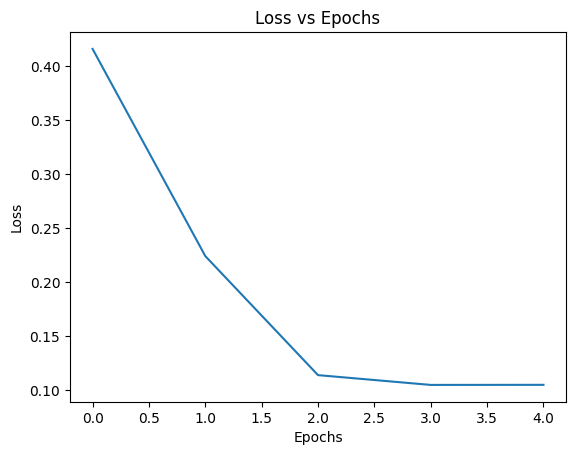

In [98]:
from matplotlib import pyplot as plt

plt.plot(loss_vals)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()